# **Text data analysis and class balancing**

# Import

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Settings

In [13]:
DIR = '/content/drive/MyDrive/Colab Notebooks/DAN/feedback_tracking/files/'

# Data

In [14]:
df = pd.read_csv(DIR+'data.csv')
df

,id,text,bank,rating
0,536617,"Очень довольны работой банка Работаем с ""Точко...",tochka,2
1,536578,Взять кредит— элементарно! Форма заявки элемен...,gazprombank,2
2,536577,Банк №1 в России Мы с мужем клиенты с 2019 год...,gazprombank,2
3,536567,Банк и карточка для жизни Потому что все удобн...,gazprombank,2
4,536564,Реклама кредита точно сработала Последний меся...,gazprombank,2
...,...,...,...,...
19519,425071,Лучший банк! Несколько лет являюсь клиентом Ти...,tinkoff-bank,2
19520,425070,Самый онлайновый банк в мире! Самый онлайновый...,tinkoff-bank,2
19521,425069,Чем хорош Тинькофф Работаю с Тинькофф банком с...,tinkoff-bank,2
19522,425064,Отзыв тинькофф Пользуемся этим банком более 3х...,tinkoff-bank,2


## Let's look at gaps and zero values

In [15]:
df.isna().sum()/df.shape[0]*100

id        0.0
text      0.0
bank      0.0
rating    0.0
dtype: float64

No empty values

# Тext length

In [16]:
print(f"Min length {df['text'].map(len).min()}")
print(f"Mean length {df['text'].map(len).mean():.2f}")
print(f"Max length {df['text'].map(len).max()}")

Min length 52
Mean length 331.19
Max length 3771


## Statistics and visualization

In [17]:
neg = 100*df[df['rating'] == 0].shape[0]/df.shape[0]
neut = 100*df[df['rating'] == 1].shape[0]/df.shape[0]
pos = 100*df[df['rating'] == 2].shape[0]/df.shape[0]

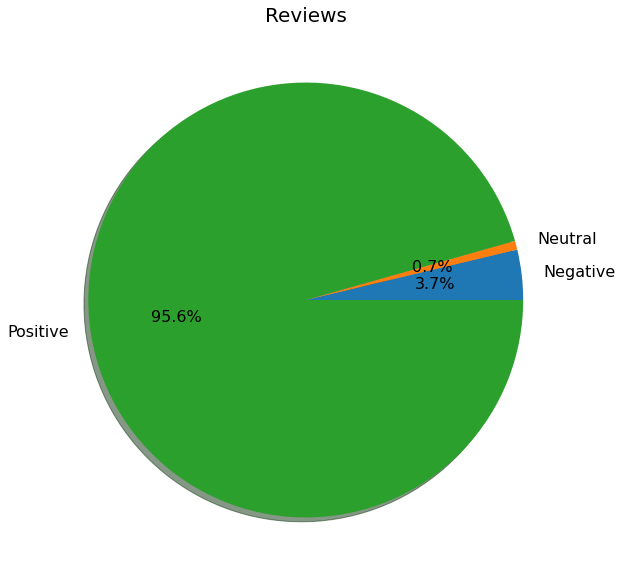

In [18]:
plt.figure(figsize=(10, 10))
plt.pie([neg, neut, pos], labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%', shadow=True, textprops = {"fontsize":16})
plt.title(label='Reviews', fontsize=20)
plt.show()

**Reviews are not balanced**

In [19]:
text_length_list = []
word_length_list = []
for i in range(df.shape[0]):
  word_list = df.loc[i, 'text'].split()
  text_length = len(word_list)
  text_length_list.append(text_length)
  for w in word_list:
    word_length_list.append(len(w))

df_text = pd.DataFrame(text_length_list)
df_text.columns = ['text_length']
df_words = pd.DataFrame(word_length_list)
df_words.columns = ['word_length']

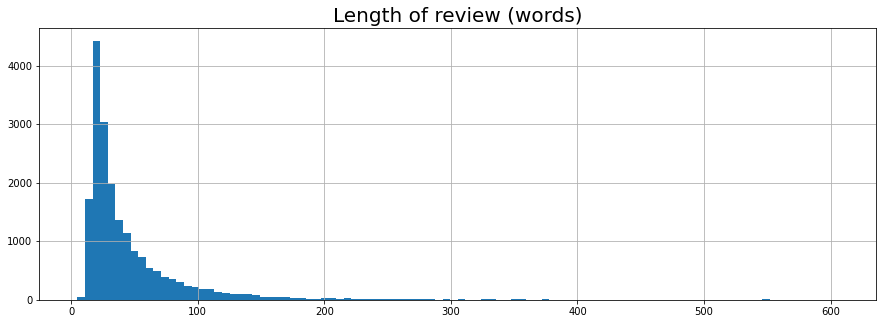

In [20]:
plt.figure(figsize=(15, 5))
plt.title(label='Length of review (words)', fontsize=20)
df_text.text_length.hist(bins=100);

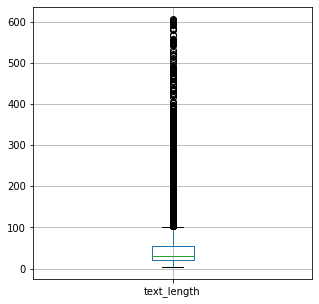

In [21]:
plt.figure(figsize=(5, 5))
df_text.boxplot('text_length');

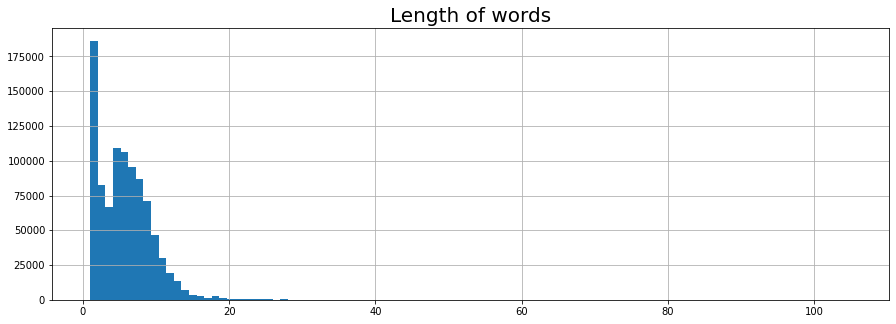

In [22]:
plt.figure(figsize=(15, 5))
plt.title(label='Length of words', fontsize=20)
df_words.word_length.hist(bins=100);

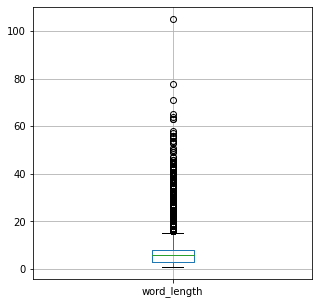

In [23]:
plt.figure(figsize=(5, 5))
df_words.boxplot('word_length');

# Class balancing

In [24]:
balanced_list = []

In [25]:
df_neg = df[df['rating'] == 0]
neg_q = df_neg.shape[0]
neg_q

balanced_list.append(df_neg)

In [26]:
df_pos = df[df['rating'] == 2][0:neg_q]
balanced_list.append(df_pos)

In [27]:
df_neut = df[df['rating'] == 1]
neut_q = df_neut.shape[0]
k = neg_q // neut_q
print(k)
n = neg_q % neut_q

for i in range(k):
  balanced_list.append(df_neut)

balanced_list.append(df_neut[0:n])

5


In [28]:
df_balanced = pd.concat(balanced_list)
df_balanced = df_balanced.sample(frac=1)
print(df_balanced.shape)

(2184, 4)


# Balanced dataset

In [29]:
neg = 100*df_balanced[df_balanced['rating'] == 0].shape[0]/df_balanced.shape[0]
neut = 100*df_balanced[df_balanced['rating'] == 1].shape[0]/df_balanced.shape[0]
pos = 100*df_balanced[df_balanced['rating'] == 2].shape[0]/df_balanced.shape[0]

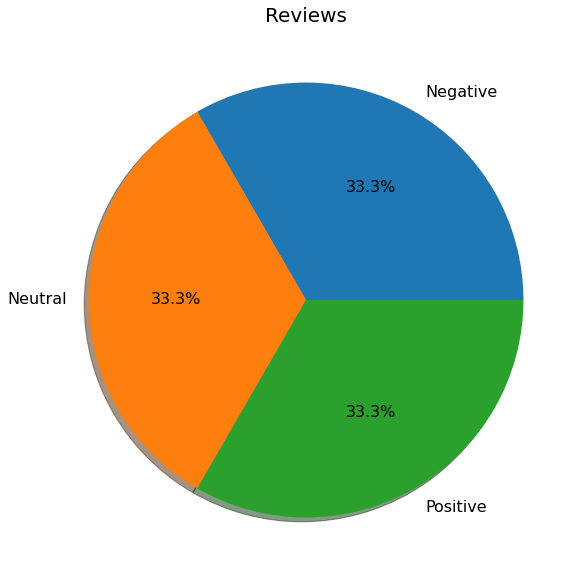

In [30]:
plt.figure(figsize=(10, 10))
plt.pie([neg, neut, pos], labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%', shadow=True, textprops = {"fontsize":16})
plt.title(label='Reviews', fontsize=20)
plt.show()

# Save dataset

In [31]:
file_path = f'{DIR}/data_balanced.csv'
df_balanced.to_csv(file_path, index=False)

In [32]:
df_balanced.head(10)

,id,text,bank,rating
8009,492896,"Отзыв после полу года работы Ч1 Доброго дня, х...",tinkoff-bank,1
124,533981,"Халва супер Уже пять лет пользуюсь халвой, не ...",sovkombank,2
117,534037,Одни из лучших ставки по вкладам. Кэшбэк норма...,sovkombank,2
18649,428316,Хамство отдела реструктуризации Звонили сегодн...,uralsib,0
260,532416,Кредитный доктор Прохожу по программе кредитны...,sovkombank,2
4374,515442,Сбербанк мошенники После взятия потребительско...,sberbank-rossii,0
13210,453499,Обслуживание клиентов банка В отличие от Альфа...,tinkoff-bank,1
597,528779,Благодарность Очень удобный банк для предприни...,tochka,2
10263,485050,МТС БАНК ПОЛНОЕ ДНО. НИКТО НИЧЕГО В ЭТОМ БАНКЕ...,mts-bank,0
516,529052,Карта Халва Карта Халва - пользуюсь на постоян...,sovkombank,2
